**Analisis de criptodivisas**

Dentro de la carpeta data, disponeis de 13 ficheros con datos de criptodivisas:

 - Bitcoin (BTC)
 - Ethereum (ETH)
 - Litecoin (LTC)
 - Bitcoin Cash (BCH)
 - Ripple (XRP)
 - Monero (XMR)
 - Iota (IOTA)
    

El objetivo de la practica es usar modelos de machine learning para predecir precios de estas divisas. Debeis ir completando los modulos del notebook. La practica tiene 10 apartados y cada apartado suma 1 punto

** * 1. Prepare Data Set **

Aqui debeis cargar los imports, leer el CSV de la divisa seleccionada y mostrar las 10 primeras filas del dataset, os dejo un ejemplo con IOTA, debeis coger otra divisa que no se IOTA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
data_path="C:\\Users\\mixcr\\OneDrive\\Escritorio\\Máster Finanzas Cuantitativas\\Sesion_1_Data Mining\\Práctica 1\\data\\data\\"

instrument='ETH'
data  = pd.read_csv(data_path +instrument+ ".csv", header=0, parse_dates=True, index_col=0)
data.head(10)

,open,high,low,close,volume,market cap
date,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,-
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,167911000
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42637600
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,43130000
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,42796500
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,64018400
2015-08-13,1.220000,1.970000,1.170000,1.830000,4068680,73935400
2015-08-14,1.810000,2.260000,1.750000,1.830000,4637030,109594000
2015-08-15,1.800000,1.880000,1.570000,1.690000,2554360,109160000


* 2.Crea una lista con todas las criptodivisas de la carpeta "data" y muestra el numero de filas de cada dataset

In [3]:
### El número de filas que se muestra es sin contar la fila con el nombre de las variables. Si quisieramos también
### esta fila, podríamos contarlo sin poner skiprows=1

num_rows=[]
criptodivisas=[]
import glob, os
dirs = glob.glob(data_path + "/*.csv")
for file in dirs:
    fichero=pd.read_csv(file, names=['date','open','high','low',
                       'close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
    num= fichero.shape[0]
    criptodivisa = os.path.splitext(os.path.basename(file))[0]
    num_rows.append(num)
    criptodivisas.append(criptodivisa)
    
criptodivisas_df=pd.DataFrame(criptodivisas)
    
for i in range(len(criptodivisas_df)):
    informacion=[print('El fichero ' + str(criptodivisas[i]) + ' tiene ' + str(num_rows[i]) + ' filas.')]
     


El fichero ADA tiene 99 filas.
El fichero BCH tiene 169 filas.
El fichero BTC tiene 1716 filas.
El fichero ETH tiene 885 filas.
El fichero IOTA tiene 209 filas.
El fichero LTC tiene 1716 filas.
El fichero NEM tiene 1013 filas.
El fichero NEO tiene 486 filas.
El fichero TRX tiene 117 filas.
El fichero XLM tiene 1252 filas.
El fichero XMR tiene 1327 filas.
El fichero XRB tiene 292 filas.
El fichero XRP tiene 1618 filas.


* 3.muestra el volumen de datos y tipos del dataset.usa info()

In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 885 entries, 2015-08-07 to 2018-01-07
Data columns (total 6 columns):
open          885 non-null float64
high          885 non-null float64
low           885 non-null float64
close         885 non-null float64
volume        885 non-null int64
market cap    885 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 48.4+ KB


* 4.Chequea missing values: isnull(), notnull(). Recordad la ayuda es ?pd.isnull() para ver como funciona una función

In [5]:
print(data.isnull().sum()) # Obtengo numero de nulos
data.isnull() #Obtenemos los nulos en cada una de las fechas en cada una de las variables
print('\n')
print(data.notnull().sum()) # Obtengo el numero de no nulos.
data.notnull()#Obtenemos los no nulos en cada una de las fechas en cada una de las variables



open          0
high          0
low           0
close         0
volume        0
market cap    0
dtype: int64


open          885
high          885
low           885
close         885
volume        885
market cap    885
dtype: int64


,open,high,low,close,volume,market cap
date,,,,,,
2015-08-07,True,True,True,True,True,True
2015-08-08,True,True,True,True,True,True
2015-08-09,True,True,True,True,True,True
2015-08-10,True,True,True,True,True,True
2015-08-11,True,True,True,True,True,True
2015-08-12,True,True,True,True,True,True
2015-08-13,True,True,True,True,True,True
2015-08-14,True,True,True,True,True,True
2015-08-15,True,True,True,True,True,True


* 5.chequea valores duplicados. duplicated()

In [6]:
data.duplicated().sum()   ## Nos da el número de duplicados total

#data.duplicated()    Esto lo pondríamos si quisieramos ver si hay o no duplicados por cada una de las fecha


0

In [7]:
data['market cap'] = pd.to_numeric(data['market cap'], errors='coerce')
data.dropna(inplace=True)

## Tratamos los blancos/missings que tiene la variable market cap

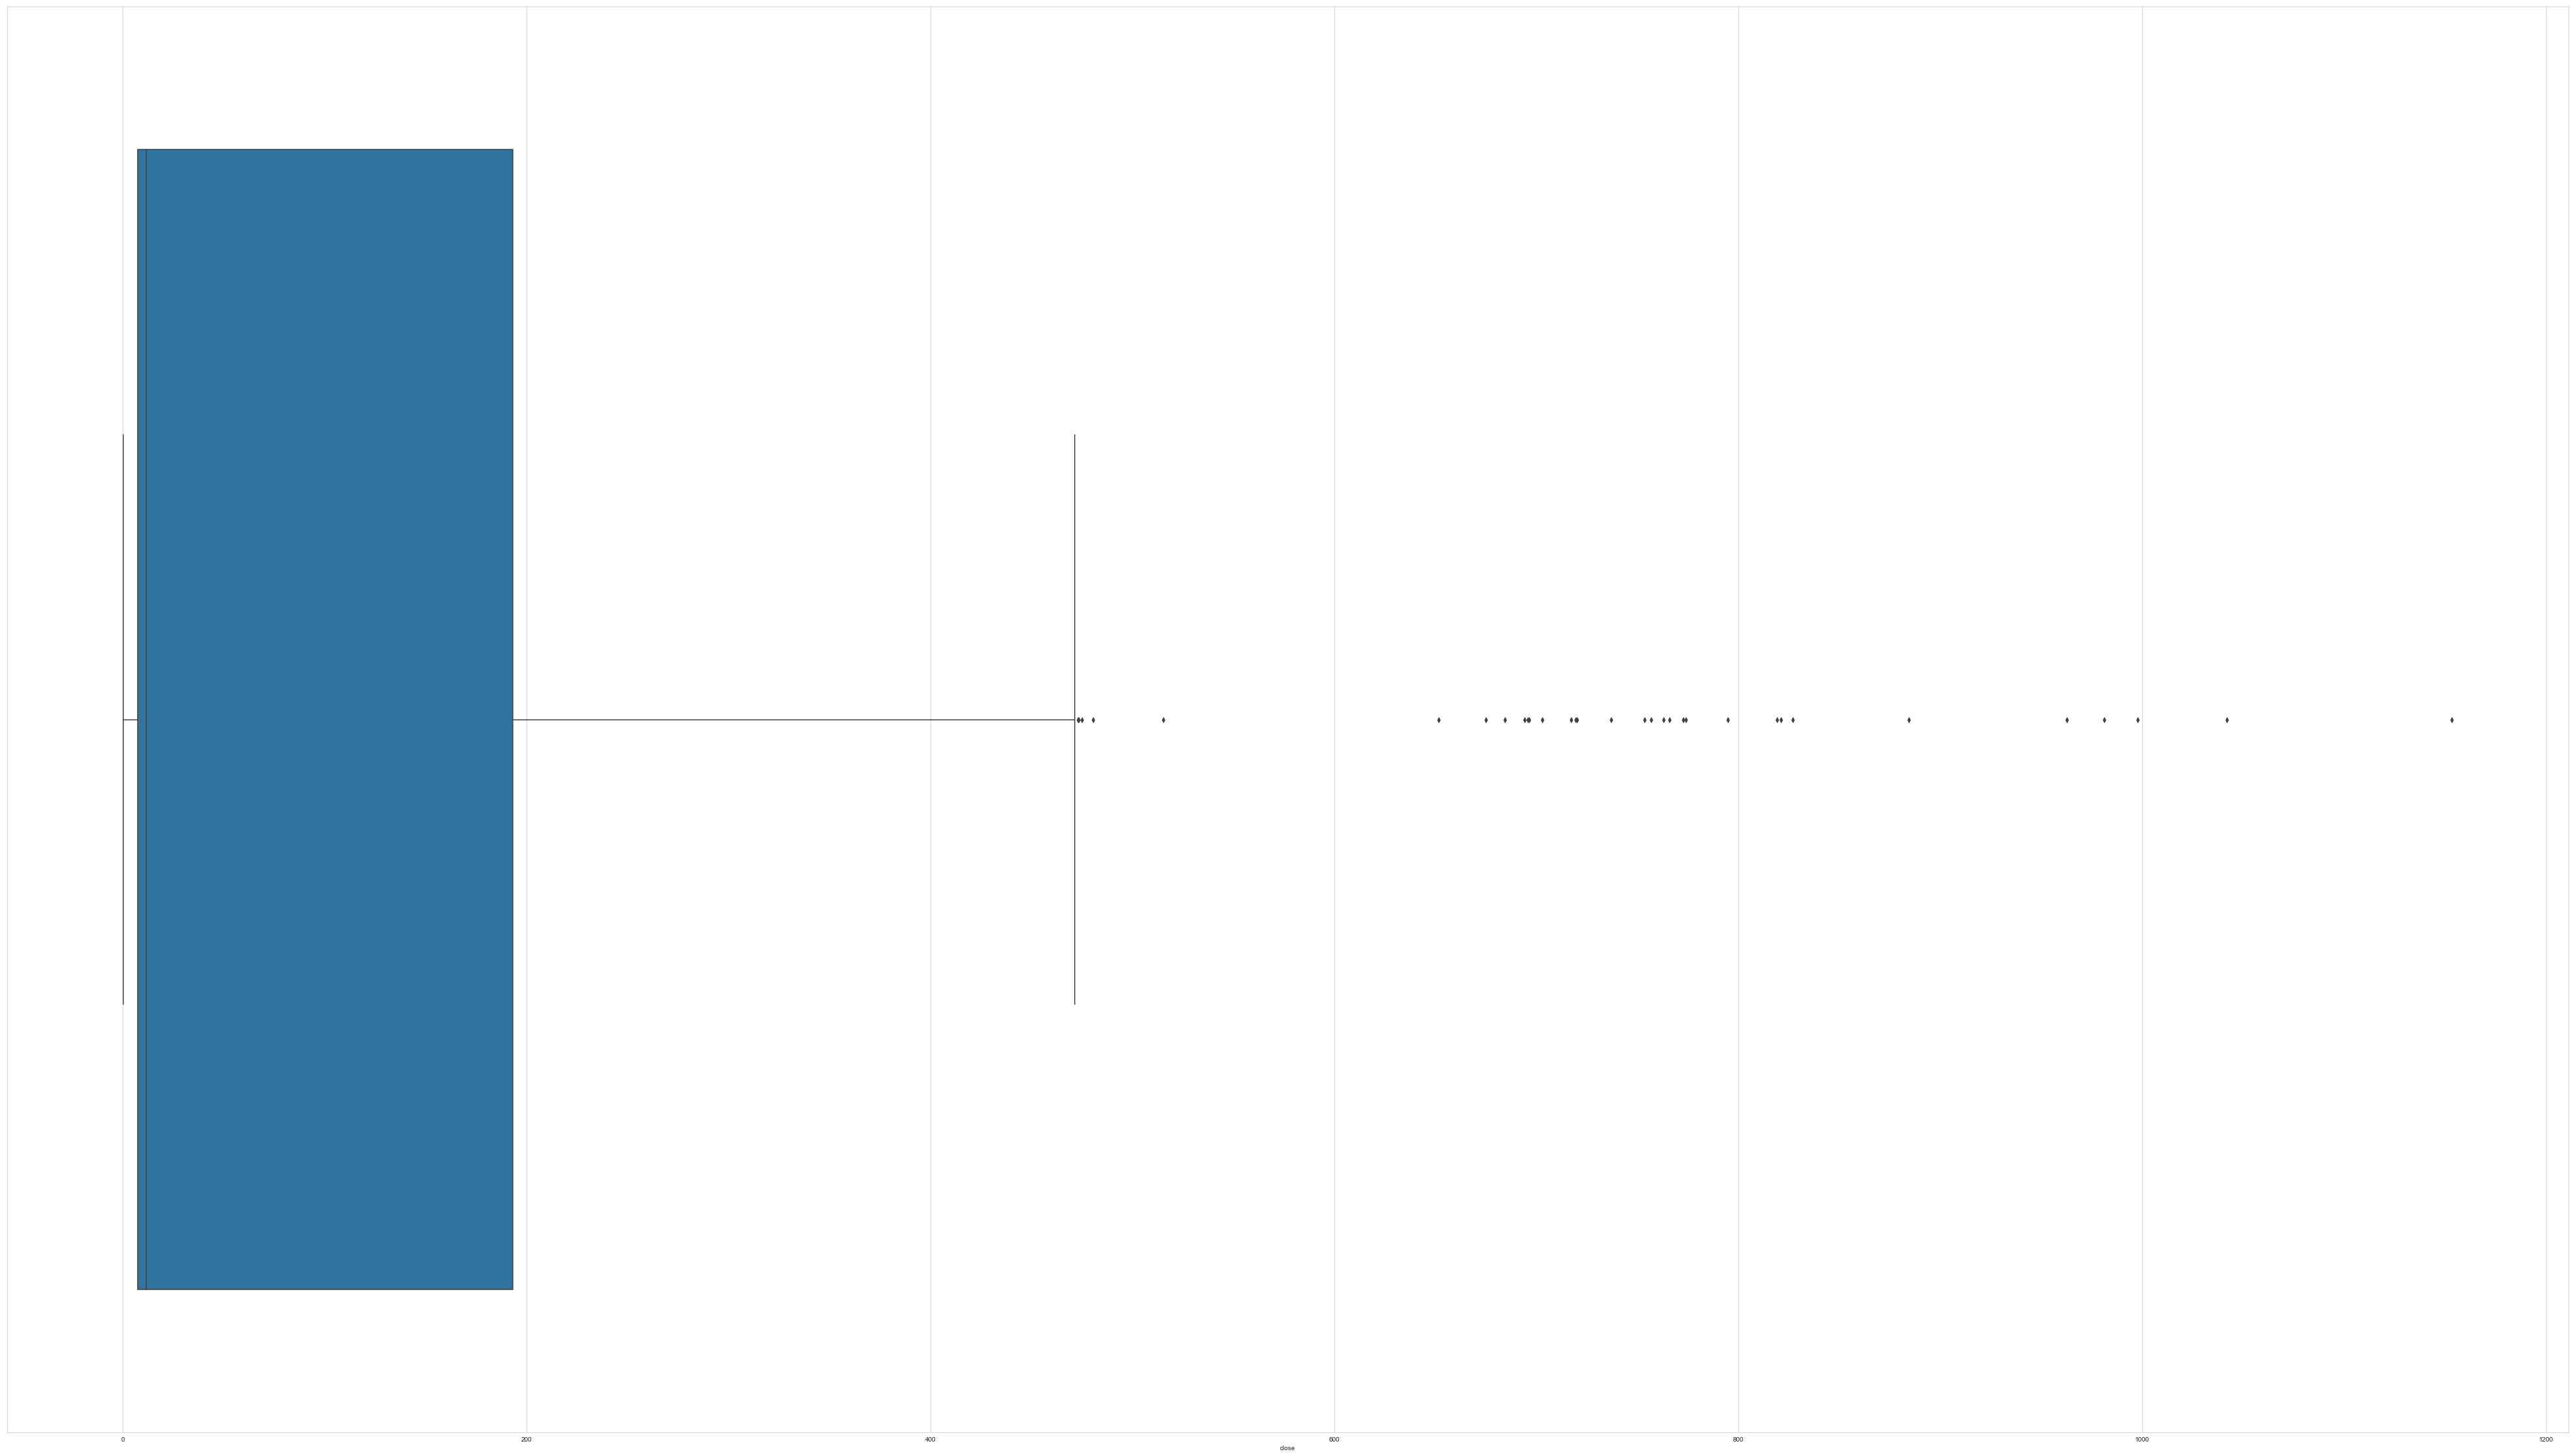

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(70, 40))
sns.boxplot(x=data['close']);


## Dibujamos el boxplot de la variable close de la moneda elegida (ETH) para ver la distribución que tienen los datos.
## La mediana de los datos es 11,78 y en la imagen podemos ver los cuartiles. Podemos ver que hay muchos datos fuera
## de los bigotes, en la parte derecha, lo cuál indica que hay muchos valores inestables.

* 6. chequea market capitalization y volume para la divisa que quieras

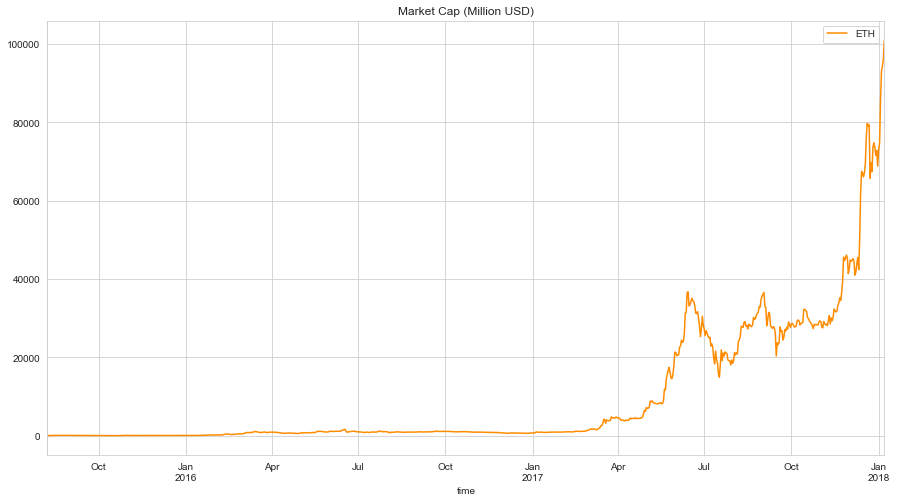

In [9]:
plt.figure(figsize=(15,8))
(data['market cap']/1000000).plot(color='darkorange', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Market Cap (Million USD)')
plt.show()

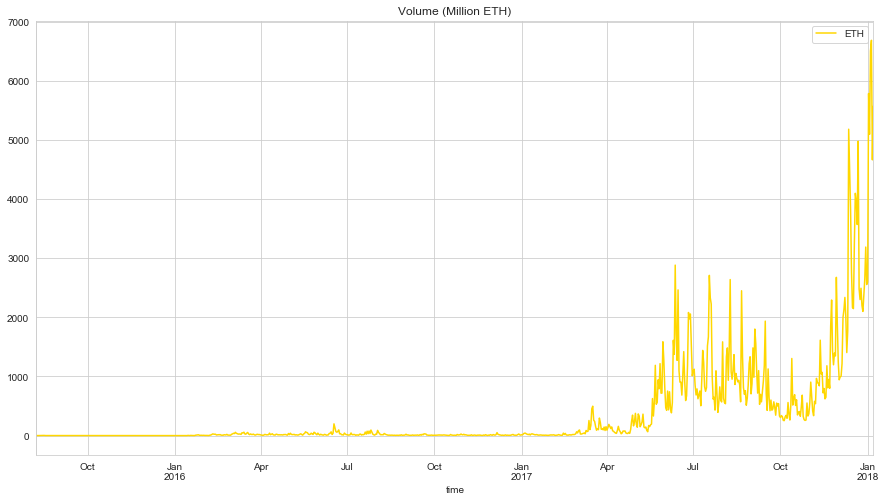

In [10]:
# 6.1.ahora chequea el volumen aqui

plt.figure(figsize=(15,8))
(data['volume']/1000000).plot(color='gold', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Volume (Million ETH)')
plt.show()

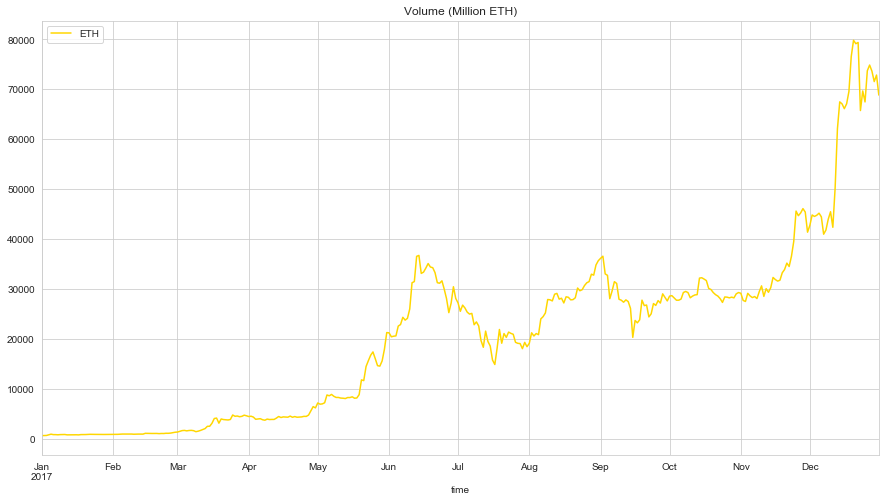

In [11]:
#7.plotea solo el año 2017 que es donde realmente hubo un gran crecimiento
#tip: data_m = data['yyyy-mm-dd':'yyyy-mm-dd']

plt.figure(figsize=(15,8))
(data.loc['2017-01-01':'2017-12-31','market cap']/1000000).plot(color='gold', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Volume (Million ETH)')
plt.show()

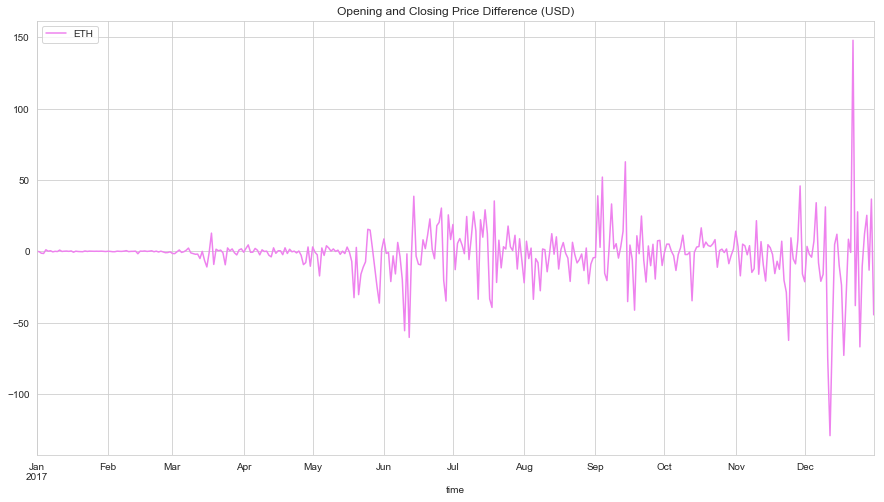

In [12]:
#8.Define una feature o atributo que sea la diferencia entre opening y closing price

## He entendido que debo mantener las mismas fechas que el anterior, si no, simplemente habría que quitarlas para dibujar
## todo el rango de fechas

data['diff_price'] = data['open'] - data['close']
#Dibujalo
plt.figure(figsize=(15,8))
(data.loc['2017-01-01':'2017-12-31','diff_price']).plot(color='Violet', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Opening and Closing Price Difference (USD)')
plt.show()

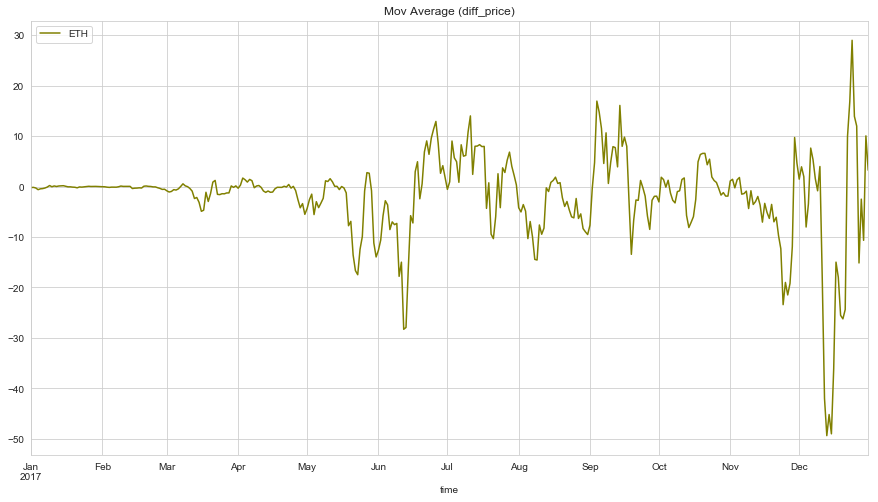

In [13]:
#Calculemos ahora una moving average (MA) de 5 dias, MA es un indicador que nos ayuda a suavizar la variacion
#del precio price, es un indicador que sigue la tendencia al basarse en precios hisotricos. Usemos rolling(window=X)
data['MA_5'] = data['diff_price'].rolling(window=5).mean().fillna(0)
#Dibujalo
plt.figure(figsize=(15,8))
(data.loc['2017-01-01':'2017-12-31','MA_5']).plot(color='Olive', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Mov Average (diff_price)')
plt.show()

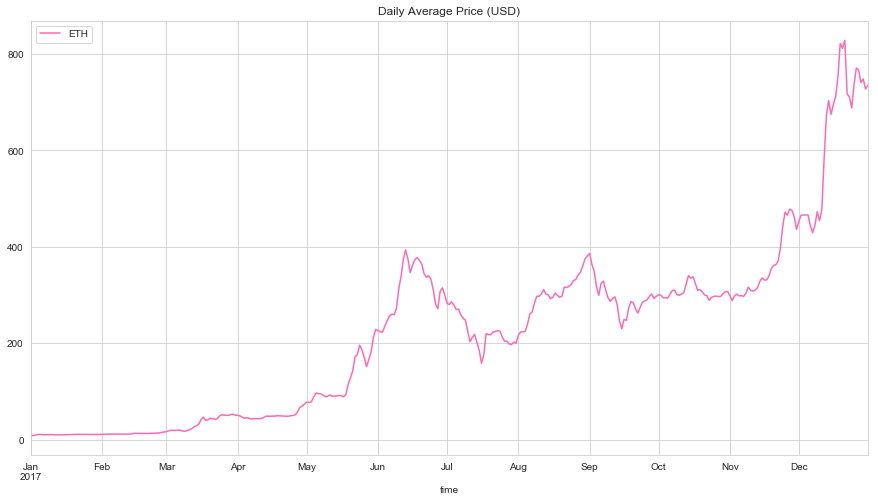

In [14]:
# 8.1.calcula daily average price como (open + high + low + close) / 4

data['daily_avg_price'] = (data['open'] + data['high'] + data['low'] + data['close'])/4
#dibujalo
plt.figure(figsize=(15,8))
(data.loc['2017-01-01':'2017-12-31','daily_avg_price']).plot(color='HotPink', label='ETH')
plt.legend()
plt.xlabel('time')
plt.title('Daily Average Price (USD)')
plt.show()

In [15]:
#9.lee el precio close de cada divisa y concatenalas para tener dataframe global de los precios close de todas las divisas
# algunos tips
#iota = data[['close']]
#ltc= data1[['close']]
#............
#close = pd.concat([iota,ltc,...], axis=1)


Criptodivisa_unica = {}
dirs = glob.glob(data_path + "/*.csv")

for fichero in dirs:
    criptodivisa = os.path.splitext(os.path.basename(fichero))[0]

    file = pd.read_csv(fichero, names=['date','open','high','low',
                       'close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)

    Criptodivisa_unica[criptodivisa] = file

lista_criptodivisas = list(Criptodivisa_unica.keys())
lista_criptodivisas

close = pd.concat(Criptodivisa_unica.values(), axis=1)['close']
close.columns = Criptodivisa_unica.keys()
close.columns
close.tail(10)


,ADA,BCH,BTC,ETH,IOTA,LTC,NEM,NEO,TRX,XLM,XMR,XRB,XRP
date,,,,,,,,,,,,,
2017-12-29,0.529299,2779.95,14656.2,753.59,3.69,245.50,1.060000,73.90,0.036348,0.322941,377.37,13.38,2.21
2017-12-30,0.639243,2392.41,12952.2,717.26,3.34,218.96,0.926883,72.40,0.036413,0.323202,330.80,12.14,2.16
2017-12-31,0.719695,2533.01,14156.4,756.73,3.55,232.10,1.030000,75.96,0.044752,0.360756,349.03,21.66,2.30
2018-01-01,0.728657,2432.54,13657.2,772.64,3.97,229.03,1.040000,78.82,0.051695,0.480008,358.99,29.57,2.39
2018-01-02,0.782587,2711.00,14982.1,884.44,4.00,255.68,1.160000,90.33,0.078682,0.564766,383.42,33.70,2.48
2018-01-03,1.080000,2608.69,15201.0,962.72,4.13,245.37,1.790000,105.56,0.094703,0.896227,412.06,25.05,3.11
2018-01-04,1.110000,2430.18,15599.2,980.92,4.08,241.37,1.640000,99.11,0.207974,0.724050,403.05,32.68,3.20
2018-01-05,0.999559,2584.48,17429.5,997.72,3.75,249.27,1.590000,95.28,0.220555,0.662712,384.94,31.40,3.05
2018-01-06,1.030000,2786.65,17527.0,1041.68,3.94,296.45,1.650000,100.86,0.174797,0.709945,452.77,29.29,3.09


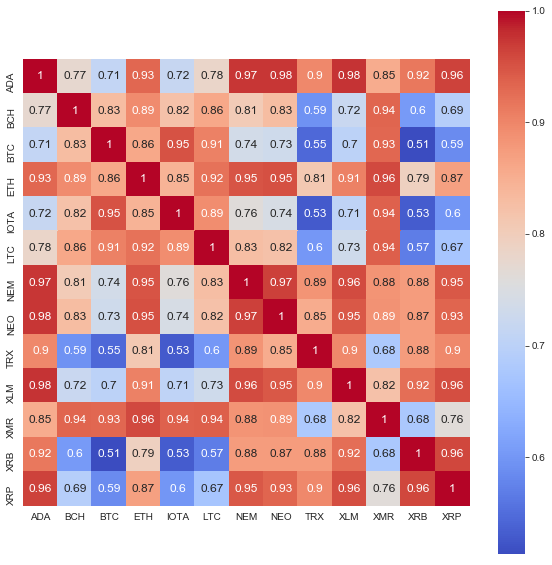

In [16]:
#9.1.chequea pearson correlation coefficient para ver la influencia del precio del bitcoin en el resto de divisas
#tips: 


close.dropna(axis=0, inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(close.corr(method="pearson") ,cbar=True, square=True,annot=True,cmap='coolwarm', annot_kws={'size': 12})


## Podemos ver que el BTC está muy correlacionado con IOTA, XMR y LTC, aunque con el resto de monedas tiene también
## una gran correlación

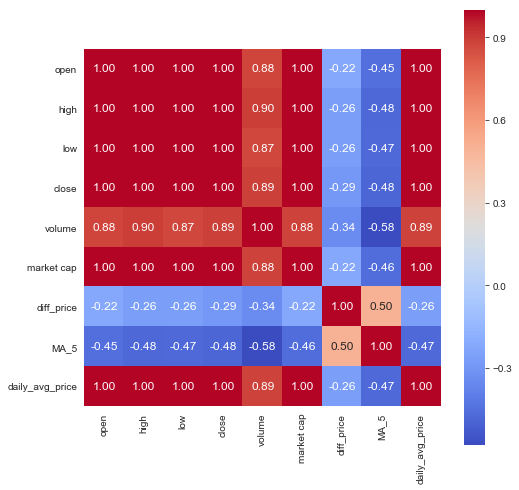

In [17]:
## Estudio la correlación entre las variables de mi dataset, con el cuál realizaré la regresión
 
corr = data.corr(method="pearson") 
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},cmap= 'coolwarm')

# En el mapa de calor vemos que las variables que menos correlación tienen con close son diff_price y MA_5,
# Las metemos también en el modelo de regresión que hago en el paso siguiente.

### Voy a hacer la regresión primero particionando sin usar K-Folds y luego haré lo mismo pero usando K-Folds.  Son dos maneras de hacerlo diferentes, K-Folds disminuye el sesgo al tener datos limitados.

#### Voy a realizar la regresión con la partición sin usar K-Folds

In [18]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data_base=data.copy()
data_regresion=data_base.copy()

dates = np.array(data_regresion.index)
dates_check = dates[-7:]  #Las últimas 7 filas
dates = dates[:-7]  #Todas las filas menos las 7 últimas

data_regresion["SevenDays"] = data_regresion["close"].shift(-7)


X = np.array(data_regresion.drop(['SevenDays', 'volume', 'open', 'high', 'low', 'market cap','daily_avg_price'], 1))

### En la X metemos las variables predictoras,uso drop para no tener en cuenta las que no quiero

X = preprocessing.scale(X)
X_Check = X[-7:]   #Las 7 últimas filas
X = X[:-7]      #Todas las filas menos las 7 últimas
data2= data_regresion.dropna(inplace = False)
y = np.array(data2["SevenDays"])   ## Variable a predecir


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)  ## Realizamos la partición de los datos

model=LinearRegression()
model.fit(X_train,y_train)

#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)


predictions = model.predict(X_Check)  #Predicción de las últimas 7 filas
predictions2 = model.predict(X)  # Predicción del resto de filas para el cálculo de errores
test_pred=model.predict(X_test)


### Elaboro una tabla con los resultados obtenidos. Los resultados se han guardado en la variable Forecast.
### Los últimos 7 días son los que nos interesan pues es lo que pide el ejercicio

In [19]:
#Elaboramos el dataframe final con las fechas
data_regresion["Fecha"]=data_regresion.index


actual = pd.DataFrame(dates, columns=["Fecha"])
actual["Forecast"] = predictions2
actual.set_index("Fecha", inplace = True)



forecast = pd.DataFrame(dates_check, columns=["Fecha"])
forecast["Forecast"] = predictions
forecast.set_index("Fecha", inplace = True)

var = [actual, forecast]
result = pd.concat(var)  
data_regresion["Forecast"]=result["Forecast"]
data_regresion

,open,high,low,close,volume,market cap,diff_price,MA_5,daily_avg_price,SevenDays,Fecha,Forecast
date,,,,,,,,,,,,
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,1.679110e+08,2.036675,0.000000,1.764512,1.690000,2015-08-08,-0.128713
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07,0.004239,0.000000,0.729259,1.570000,2015-08-09,-0.106169
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07,0.005541,0.000000,0.697209,1.200000,2015-08-10,-0.099099
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07,-0.361913,0.000000,0.892831,1.090000,2015-08-11,0.308058
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,6.401840e+07,-0.160000,0.304908,1.113402,1.260000,2015-08-12,0.569465
2015-08-13,1.220000,1.970000,1.170000,1.830000,4068680,7.393540e+07,-0.610000,-0.224427,1.547500,1.460000,2015-08-13,1.065547
2015-08-14,1.810000,2.260000,1.750000,1.830000,4637030,1.095940e+08,-0.020000,-0.229274,1.912500,1.400000,2015-08-14,1.041088
2015-08-15,1.800000,1.880000,1.570000,1.690000,2554360,1.091600e+08,0.110000,-0.208383,1.735000,1.380000,2015-08-15,0.891177
2015-08-16,1.680000,1.700000,1.090000,1.570000,3550790,1.020280e+08,0.110000,-0.114000,1.510000,1.350000,2015-08-16,0.793609


### Realizo un resumen de los parámetros del modelo

In [20]:
#10.define una variable que sea el precio de la divisa en 7 dias, es decir queremos predecir el precio de la siguiente semana.
#usa diferentes algoritmos de machine learning para regresion
#calcula mean_absolute_error y mean_squared_error


print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('\n')

print('Valor de las pendientes o coeficientes "a":')
print(model.coef_)
print('\n')

print('Valor de la intersección o coeficiente "b":')
print(model.intercept_)


#ERRORES
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('\n')

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE



Valor de las pendientes o coeficientes "a":
[193.71319334  -0.52813261   2.3741244 ]


Valor de la intersección o coeficiente "b":
112.19460686180611
Mean Absolute Error: 11.72812663051345
Mean Squared Error: 768.0413074047465




## Ahora hacemos el mismo proceso que anteriormente pero haciendo la partición por K-Folds 
### (son dos maneras independientes de hacerlo, K-Folds disminuye el sesgo al tener datos limitados)

In [21]:
#10.define una variable que sea el precio de la divisa en 7 dias, es decir queremos predecir el precio de la siguiente semana.
#usa diferentes algoritmos de machine learning para regresion
#calcula mean_absolute_error y mean_squared_error

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


data_kfolds=data_base.copy()

dates = np.array(data_kfolds.index)
dates_check = dates[-7:]  #Las últimas 7 filas
dates = dates[:-7]  #Todas las filas menos las 7 últimas

data_kfolds["SevenDays"] = data_kfolds["close"].shift(-7)



X = np.array(data_kfolds.drop(['SevenDays', 'volume', 'open', 'high', 'low', 'market cap','daily_avg_price'], 1))

X = preprocessing.scale(X)
X_Check = X[-7:]   #Las 7 últimas filas
Xs = X[:-7]      #Todas las filas menos las 7 últimas
data2= data_kfolds.dropna(inplace = False)
y = np.array(data2["SevenDays"])


scores = []
Lreg=LinearRegression()
cv = KFold(n_splits=10, random_state=42,shuffle=False)
for train_index, test_index in cv.split(Xs):


    X_train, X_test, y_train, y_test = Xs[train_index], Xs[test_index], y[train_index], y[test_index]
    Lreg.fit(X_train, y_train)
    scores.append(Lreg.score(X_test, y_test))

Lreg.fit(X_train, y_train)
scores.append(Lreg.score(X_test, y_test))
conf=np.mean(scores) 

predictions = Lreg.predict(X_Check)  #Predicción de las últimas 7 filas
predictions2 = Lreg.predict(Xs)  # Predicción del resto de filas para el cálculo de errores
test_pred=Lreg.predict(X_test)

predictions2




array([  3.41657256,   3.34954861,   3.35606727,   3.71239143,
         3.50161081,   4.73151079,   4.74188092,   4.57904719,
         4.34796055,   3.85447368,   3.56781325,   3.75157834,
         4.02519432,   3.97496834,   4.03996511,   4.03394306,
         3.86564769,   3.70488269,   3.74988752,   3.74034435,
         3.79620767,   3.81273974,   4.00517591,   4.04807043,
         4.04318983,   3.96034496,   3.92327158,   3.90199855,
         3.97589306,   3.92745468,   3.88022822,   3.87709107,
         3.83796073,   3.77459409,   3.55737976,   3.63659225,
         3.51221753,   3.44363914,   3.53681948,   3.5343545 ,
         3.48136214,   3.48055807,   3.53182409,   3.58448558,
         3.5687665 ,   3.55516681,   3.5493181 ,   3.44312132,
         3.3328033 ,   3.39796454,   3.32165424,   3.15417257,
         3.26927341,   3.38452801,   3.31545677,   3.31906068,
         3.36286722,   3.32077109,   3.25405021,   3.29257805,
         3.24360774,   3.25634479,   3.28840175,   3.27

In [22]:
#Elaboramos el dataframe final con las fechas
data_kfolds["Fecha"]=data_kfolds.index


actual = pd.DataFrame(dates, columns=["Fecha"])
actual["Forecast"] = predictions2
actual.set_index("Fecha", inplace = True)

forecast = pd.DataFrame(dates_check, columns=["Fecha"])
forecast["Forecast"] = predictions
forecast.set_index("Fecha", inplace = True)

var = [actual, forecast]
result = pd.concat(var)  
data_kfolds["Forecast"]=result["Forecast"]
data_kfolds



,open,high,low,close,volume,market cap,diff_price,MA_5,daily_avg_price,SevenDays,Fecha,Forecast
date,,,,,,,,,,,,
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,1.679110e+08,2.036675,0.000000,1.764512,1.690000,2015-08-08,3.416573
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,4.263760e+07,0.004239,0.000000,0.729259,1.570000,2015-08-09,3.349549
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,4.313000e+07,0.005541,0.000000,0.697209,1.200000,2015-08-10,3.356067
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,4.279650e+07,-0.361913,0.000000,0.892831,1.090000,2015-08-11,3.712391
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,6.401840e+07,-0.160000,0.304908,1.113402,1.260000,2015-08-12,3.501611
2015-08-13,1.220000,1.970000,1.170000,1.830000,4068680,7.393540e+07,-0.610000,-0.224427,1.547500,1.460000,2015-08-13,4.731511
2015-08-14,1.810000,2.260000,1.750000,1.830000,4637030,1.095940e+08,-0.020000,-0.229274,1.912500,1.400000,2015-08-14,4.741881
2015-08-15,1.800000,1.880000,1.570000,1.690000,2554360,1.091600e+08,0.110000,-0.208383,1.735000,1.380000,2015-08-15,4.579047
2015-08-16,1.680000,1.700000,1.090000,1.570000,3550790,1.020280e+08,0.110000,-0.114000,1.510000,1.350000,2015-08-16,4.347961


In [23]:
#10.define una variable que sea el precio de la divisa en 7 dias, es decir queremos predecir el precio de la siguiente semana.
#usa diferentes algoritmos de machine learning para regresion
#calcula mean_absolute_error y mean_squared_error


print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('\n')

print('Valor de las pendientes o coeficientes "a":')
print(Lreg.coef_)
print('\n')

print('Valor de la intersección o coeficiente "b":')
print(Lreg.intercept_)


mseModel_Linear = mean_squared_error(y_test,test_pred) # datos_reales vs datos_predichos
msaModel_Linear = mean_absolute_error(y_test,test_pred)

#ERRORES
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mseModel_Linear)
print('Mean Squared Error:', msaModel_Linear)
print('\n')

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE



Valor de las pendientes o coeficientes "a":
[ 1.77065929e+02  1.07253352e-01 -8.08176577e+00]


Valor de la intersección o coeficiente "b":
107.64914599076641
Mean Absolute Error: 12208.623505691858
Mean Squared Error: 69.18264614692562




## Pasamos a realizar las regresiones de Ridge y Lasso

In [24]:
## RIDGE REGRESSION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.linear_model import Lasso


data_ridge=data_base.copy()
dates = np.array(data_ridge.index)

dates_check = dates[-7:]  #Las últimas 7 filas
dates = dates[:-7]  #Todas las filas menos las 7 últimas

data_ridge["SevenDays"] = data_ridge["close"].shift(-7)

X = np.array(data_ridge.drop(['SevenDays', 'volume', 'open', 'high', 'low', 'market cap','daily_avg_price'], 1))

X = preprocessing.scale(X)
X_Check = X[-7:]   #Las 7 últimas filas
X = X[:-7]      #Todas las filas menos las 7 últimas
data2_ridge= data_ridge.dropna(inplace = False)
y = np.array(data2_ridge["SevenDays"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

train=X_train.shape
test=X_test.shape

test
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

from sklearn.linear_model import Ridge

alphaVector = [0.0001,0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]
# este vector puede definirse en escala logarítmica como:
alphaVector = np.logspace(-10,10,21)
print(alphaVector)
mseVector = np.zeros(alphaVector.shape)


for i in range(0,len(alphaVector)):
    
    alphaValue = alphaVector[i]
    ridgeModel = Ridge(alpha = alphaValue)
    ridgeModel.fit(XtrainScaled,y_train)
    w = ridgeModel.coef_[0]
    norm_w2 = np.dot(w,w.T)
    
    print ('Ajustado modelo con alpha = %0.2g ...' % alphaValue, '\t con ||w||_2^2 = %0.3g' % norm_w2)
    
    ypred = ridgeModel.predict(XtestScaled)
    mseVector[i] = mean_squared_error(y_test,ypred)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]
Ajustado modelo con alpha = 1e-10 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1e-09 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1e-08 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1e-07 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1e-06 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1e-05 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 0.0001 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 0.001 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 0.01 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 0.1 ... 	 con ||w||_2^2 = 3.1e+04
Ajustado modelo con alpha = 1 ... 	 con ||w||_2^2 = 3.09e+04
Ajustado modelo con alpha = 10 ... 	 con ||w||_2^2 = 3e+04
Ajustado modelo con alpha = 1e+02 ... 	 con ||w||_2^2 = 2.29e+04
Ajustado modelo con alpha 

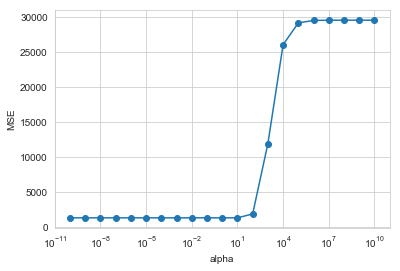

In [25]:
# Representemos el MSE para cada alpha
plt.semilogx(alphaVector,mseVector,'-o')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

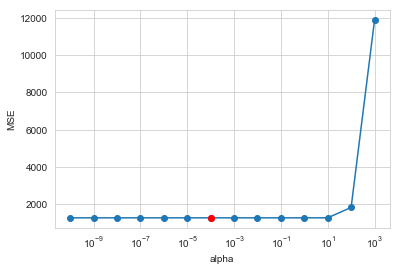

In [26]:
idx_alpha = alphaVector <= 1e3

plt.semilogx(alphaVector[idx_alpha],mseVector[idx_alpha],'-o')
plt.semilogx(alphaVector[alphaVector == 1e-4], mseVector[alphaVector == 1e-4],'ro')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [27]:
from sklearn.model_selection import KFold

number_of_folds = 10 #scikit-learn los llama splits
kf  = KFold(n_splits=number_of_folds, shuffle = True, random_state=1)

alphaVector = np.logspace(-4,4,21)

# inicializamos una matriz de errores, para cada valor de alpha y cada iteración del algoritmo de cross-validation
# - tantas filas como número de folds
# - tantas columnas como valores de alphaVector
mseMatriz = np.zeros((number_of_folds,len(alphaVector))) 


j = 0 # inicializamos contador de columnas
for alphaValue in alphaVector:
       
    ridgeModel = Ridge(alpha = alphaValue)
    
    i = 0 # inicializamos contador de filas
    for idxTrain, idxVal in kf.split(XtrainScaled):
      
        Xt = XtrainScaled[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = XtrainScaled[idxVal,:]
        yv = y_train[idxVal]
        
        ridgeModel.fit(Xt,yt)
        ypred = ridgeModel.predict(Xv)   
        mseMatriz[i,j] = mean_squared_error(yv,ypred) 
        
        i+=1
    j+=1

mseVector = np.mean(mseMatriz,axis=0)

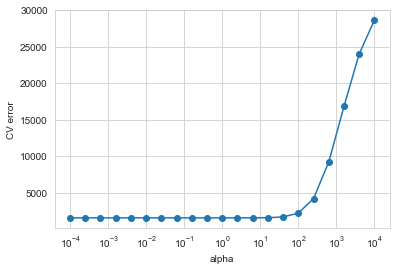

In [28]:
plt.semilogx(alphaVector,mseVector,'-o')
plt.xlabel('alpha')
plt.ylabel('CV error')
plt.show()

In [29]:
idx = np.argmin(mseVector)
alphaOpt = alphaVector[idx]

print ('El valor óptimo de alpha es: %1.0g' % alphaOpt)

El valor óptimo de alpha es: 1


In [30]:
ridgeModel = Ridge(alpha = alphaOpt)  # uso el modelo con el alpha escogido
ridgeModel.fit(XtrainScaled,y_train)  # lo ajusto  a mis datos

# Hago las predicciones usando el modelo.
Future_pred = ridgeModel.predict(X_Check)  #predigo los precios de los siete dias 
Past_pred = ridgeModel.predict(X)   #predigo los precios de los días pasados hasta el actual.
Pred_test_ridge=ridgeModel.predict(X_test)

#ERRORES
from sklearn.metrics import mean_squared_error

mseModelRidge = mean_squared_error(y_test,Pred_test_ridge) # datos_reales vs datos_predichos
msaModelRidge = mean_absolute_error(y_test,Pred_test_ridge)
print ('MSE Ridge : %0.3g' % mseModelRidge)
print ('MSA Ridge  : %0.3g' % msaModelRidge)

MSE Ridge : 1.53e+03
MSA Ridge  : 16.3


In [31]:
#Elaboramos el dataframe final con las fechas
data_ridge["Fecha"]=data_ridge.index

actual = pd.DataFrame(dates, columns=["Fecha"])
actual["Forecast_Ridge"] = Past_pred
actual.set_index("Fecha", inplace = True)


forecast_ridge= pd.DataFrame(dates_check, columns=["Fecha"])
forecast_ridge["Forecast_Ridge"] = Future_pred
forecast_ridge.set_index("Fecha", inplace = True)

var = [actual, forecast_ridge]
result = pd.concat(var)  
data_ridge["Forecast_Ridge"]=result["Forecast_Ridge"]

data_ridge.head(5)

,open,high,low,close,volume,market cap,diff_price,MA_5,daily_avg_price,SevenDays,Fecha,Forecast_Ridge
date,,,,,,,,,,,,
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,167911000.0,2.036675,0.000000,1.764512,1.69,2015-08-08,3.119083
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42637600.0,0.004239,0.000000,0.729259,1.57,2015-08-09,3.057940
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,43130000.0,0.005541,0.000000,0.697209,1.20,2015-08-10,3.064409
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,42796500.0,-0.361913,0.000000,0.892831,1.09,2015-08-11,3.419202
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,64018400.0,-0.160000,0.304908,1.113402,1.26,2015-08-12,3.533426


In [32]:
###LASSO REGRESSION#######
import numpy as np
from sklearn.linear_model import Lasso
from sklearn import preprocessing

data_lasso=data_base.copy()
dates = np.array(data_lasso.index)

dates_check = dates[-7:]  #Las últimas 7 filas
dates = dates[:-7]  #Todas las filas menos las 7 últimas

data_lasso["SevenDays"] = data_lasso["close"].shift(-7)

X = np.array(data_lasso.drop(['SevenDays', 'volume', 'open', 'high', 'low', 'market cap','daily_avg_price'], 1))
X = preprocessing.scale(X)

X_Check = X[-7:]   #Las 7 últimas filas
X = X[:-7]      #Todas las filas menos las 7 últimas
data2_lasso= data_lasso.dropna(inplace = False)
y = np.array(data2_lasso["SevenDays"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

train=X_train.shape
test=X_test.shape

test
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)



alphaVector = [0.0001,0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000, 10000]
# este vector puede definirse en escala logarítmica como:
alphaVector = np.logspace(-10,10,21)


In [33]:
from sklearn.model_selection import KFold

number_of_folds = 10 #scikit-learn los llama splits
kf  = KFold(n_splits=number_of_folds, shuffle = True, random_state=1)

alphaVector = np.logspace(-4,4,21)

mseMatriz = np.zeros((number_of_folds,len(alphaVector)))

j = 0 # inicializamos contador de columnas
for alphaValue in alphaVector:
       
    lassoModel = Lasso(alpha = alphaValue)
   
    i = 0 # inicializamos contador de filas
    for idxTrain, idxVal in kf.split(XtrainScaled):
     
        Xt = XtrainScaled[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = XtrainScaled[idxVal,:]
        yv = y_train[idxVal]
       
        lassoModel.fit(Xt,yt)
        ypred = lassoModel.predict(Xv)  
        mseMatriz[i,j] = mean_squared_error(yv,ypred)
       
        i+=1
    j+=1

mseVector = np.mean(mseMatriz,axis=0)

In [34]:
idx = np.argmin(mseVector)
alphaOpt = alphaVector[idx]

print ('El valor óptimo de alpha es: %1.0g' % alphaOpt)

El valor óptimo de alpha es: 3


In [35]:
lassoModel = Lasso(alpha = alphaOpt)  # uso el modelo con el alpha escogido
lassoModel.fit(XtrainScaled,y_train)  # lo ajusto  a mis datos

# Hago las predicciones usando el modelo.
Future_pred_lasso = lassoModel.predict(X_Check)  #predigo los precios de los siete dias 
Past_pred_lasso= lassoModel.predict(X)   #predigo los precios de los días pasados hasta el actual.
Pred_test_lasso=lassoModel.predict(X_test)
#ERRORES

mseModelLasso = mean_squared_error(y_test,Pred_test_lasso)
msaModelLasso = mean_absolute_error(y_test,Pred_test_lasso)
print ('MSE Lasso : %0.3g' % mseModelLasso)
print ('MSA Lasso  : %0.3g' % msaModelLasso)


MSE Lasso : 1.73e+03
MSA Lasso  : 16.2


In [36]:
#Elaboramos el dataframe final con las fechas
data_lasso["Fecha"]=data_lasso.index

actual = pd.DataFrame(dates, columns=["Fecha"])
actual["Forecast_Lasso"] = Past_pred_lasso
actual.set_index("Fecha", inplace = True)


forecast_lasso= pd.DataFrame(dates_check, columns=["Fecha"])
forecast_lasso["Forecast_Lasso"] = Future_pred_lasso
forecast_lasso.set_index("Fecha", inplace = True)

var = [actual, forecast_lasso]
result = pd.concat(var)  
data_lasso["Forecast_Lasso"]=result["Forecast_Lasso"]


## La siguiente tabla muestra la predicción a 7 días después de la fecha "Date"

In [37]:
# TABLA PREDICCIONES MODELOS: 
resultados_modelos = pd.concat([data_regresion["Forecast"],data_ridge["Forecast_Ridge"],data_lasso["Forecast_Lasso"]], axis=1)
resultados_modelos=resultados_modelos.rename(columns = {'Forecast':'Predic_+7dias_Regresion','Forecast_Ridge':'Predic_+7dias_Regresion_Ridge', 'Forecast_Lasso':'Predic_+7dias_Regresion_Lasso'})
resultados_modelos

,Predic_+7dias_Regresion,Predic_+7dias_Regresion_Ridge,Predic_+7dias_Regresion_Lasso
date,,,
2015-08-08,-0.128713,3.119083,5.340469
2015-08-09,-0.106169,3.057940,5.291347
2015-08-10,-0.099099,3.064409,5.297604
2015-08-11,0.308058,3.419202,5.642944
2015-08-12,0.569465,3.533426,5.786218
2015-08-13,1.065547,4.193286,6.368865
2015-08-14,1.041088,4.196861,6.368865
2015-08-15,0.891177,4.057031,6.235142
2015-08-16,0.793609,3.927882,6.120523


In [38]:
#TABLA DE ERRORES MODELOS
# errores_modelos = pd.DataFrame(columns=['Linear','Ridge','Lasso'])

print('ERRORES DE LOS MODELOS')
print()
print('\n')

print('Mean Square Error Linear Regression:')
print(mseModel_Linear)
print('Mean Absolute Error Linear Regression:')
print(msaModel_Linear)
print('\n')


print('Mean Square Error Ridge Regression:' )
print(mseModelRidge)
print('Mean Absolute Error Ridge Regression:')
print(msaModelRidge)
print('\n')

print('Mean Square Error Lasso Regression:' )
print(mseModelLasso)
print('Mean Absolute Error Lasso Regression:')
print( msaModelLasso)
print('\n')




ERRORES DE LOS MODELOS



Mean Square Error Linear Regression:
12208.623505691858
Mean Absolute Error Linear Regression:
69.18264614692562


Mean Square Error Ridge Regression:
1528.982412960085
Mean Absolute Error Ridge Regression:
16.346279774644348


Mean Square Error Lasso Regression:
1725.1518120749474
Mean Absolute Error Lasso Regression:
16.20987244746529


